In [2]:
import pandas as pd
df = pd.read_csv('/content/Fish[1].csv')

display(df.head())

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
print(df.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [6]:
numerical_cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
df_regression = df[numerical_cols]

missing_values_count = df_regression.isnull().sum()

if missing_values_count.sum() > 0:
    print("Missing values found in the following columns:")
    print(missing_values_count[missing_values_count > 0])
    df_regression_cleaned = df_regression.dropna()
    print("Rows with missing values have been dropped.")
    df = df_regression_cleaned.copy()
else:
    print("No missing values found in the selected numerical columns.")
    df = df_regression.copy()

print("\nUpdated DataFrame for regression:")
print(df.head())
print(f"New shape of DataFrame: {df.shape}")

No missing values found in the selected numerical columns.

Updated DataFrame for regression:
   Weight  Length1  Length2  Length3   Height   Width
0   242.0     23.2     25.4     30.0  11.5200  4.0200
1   290.0     24.0     26.3     31.2  12.4800  4.3056
2   340.0     23.9     26.5     31.1  12.3778  4.6961
3   363.0     26.3     29.0     33.5  12.7300  4.4555
4   430.0     26.5     29.0     34.0  12.4440  5.1340
New shape of DataFrame: (159, 6)


--- Performing Linear Regressions with 'Weight' as Dependent Variable ---


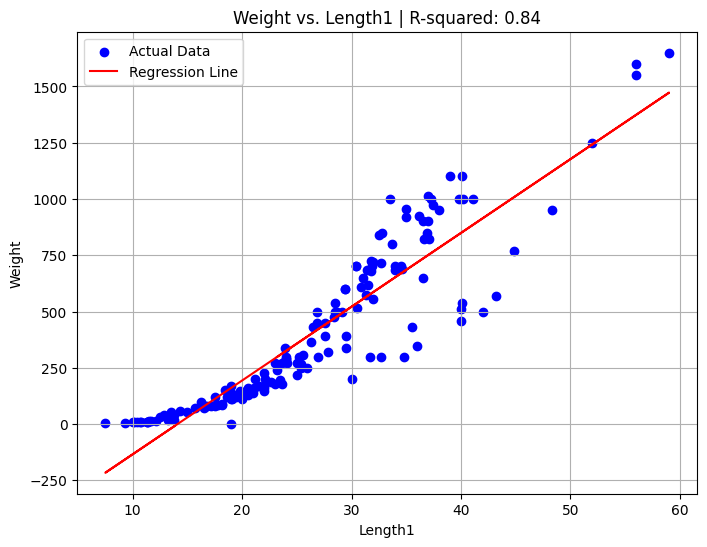

Regression for Weight vs. Length1: R-squared = 0.8385


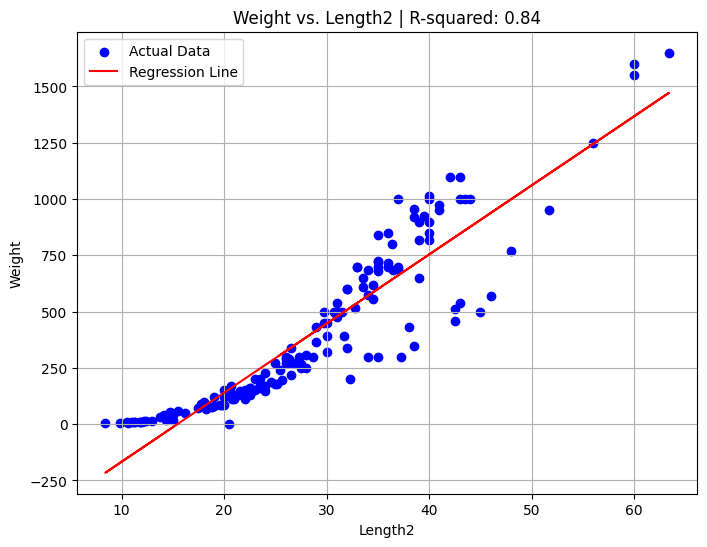

Regression for Weight vs. Length2: R-squared = 0.8439


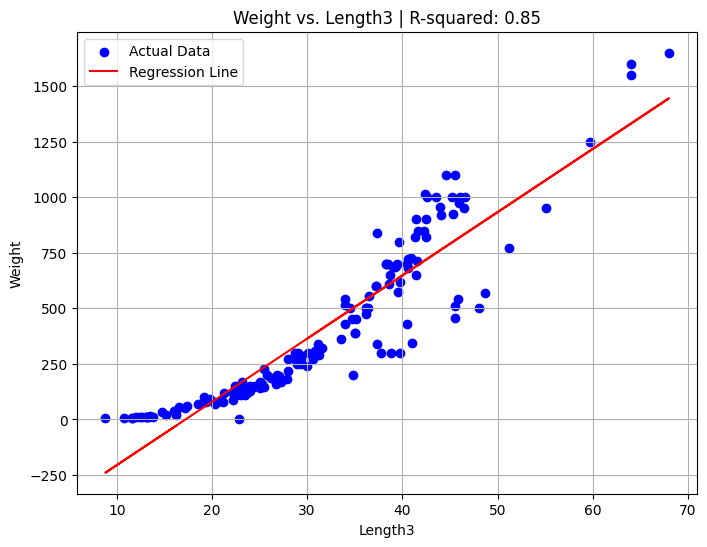

Regression for Weight vs. Length3: R-squared = 0.8520


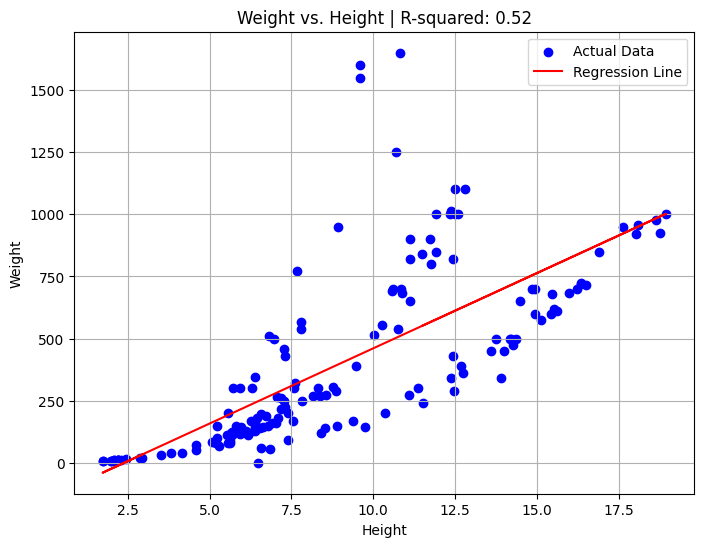

Regression for Weight vs. Height: R-squared = 0.5247


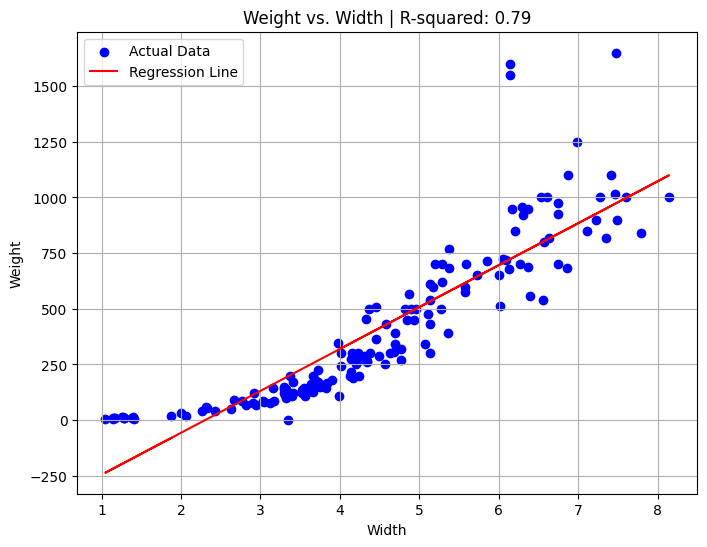

Regression for Weight vs. Width: R-squared = 0.7859


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define dependent and independent variables for the first set of regressions
y = df['Weight']
independent_vars_set1 = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

print(" Performing Linear Regressions with 'Weight' as Dependent Variable ")

for ind_var in independent_vars_set1:
    X = df[[ind_var]].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)


    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title(f'Weight vs. {ind_var} | R-squared: {r2:.2f}')
    plt.xlabel(ind_var)
    plt.ylabel('Weight')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Regression for Weight vs. {ind_var}: R-squared = {r2:.4f}")



--- Performing Linear Regressions with 'Length1' as Dependent Variable ---


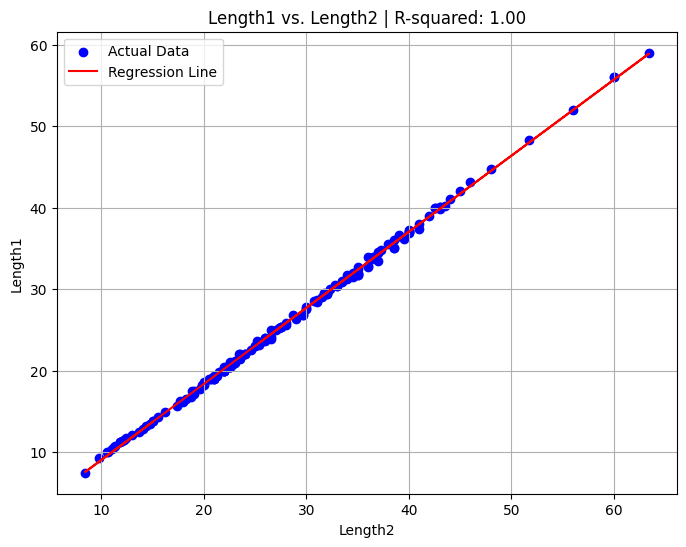

Regression for Length1 vs. Length2: R-squared = 0.9990


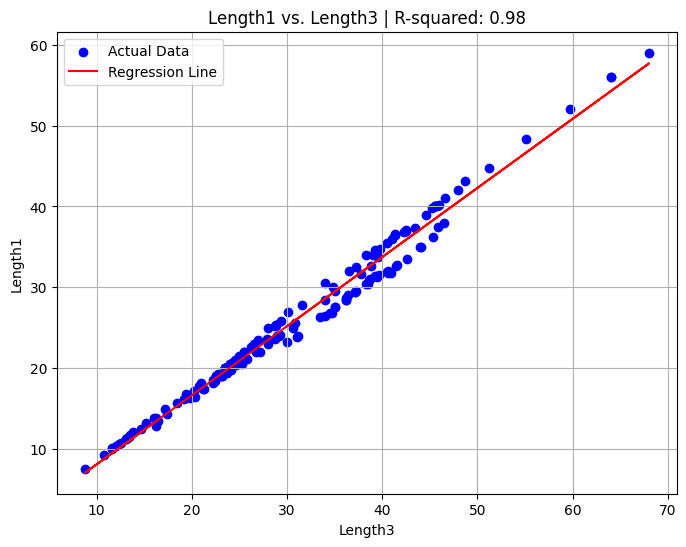

Regression for Length1 vs. Length3: R-squared = 0.9841


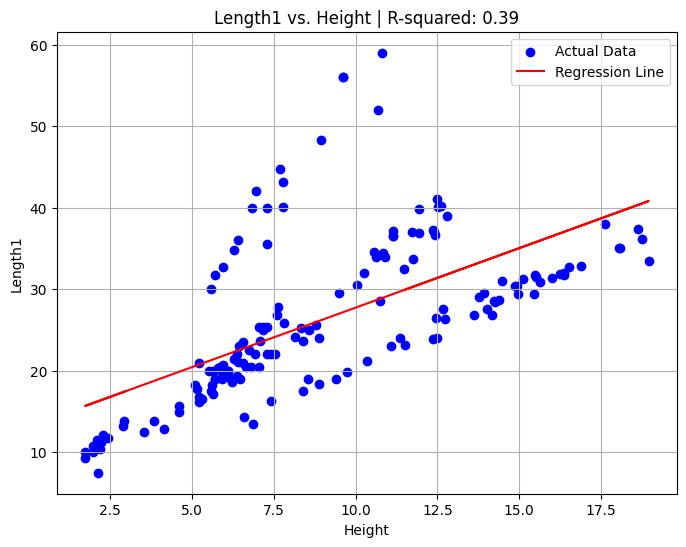

Regression for Length1 vs. Height: R-squared = 0.3911


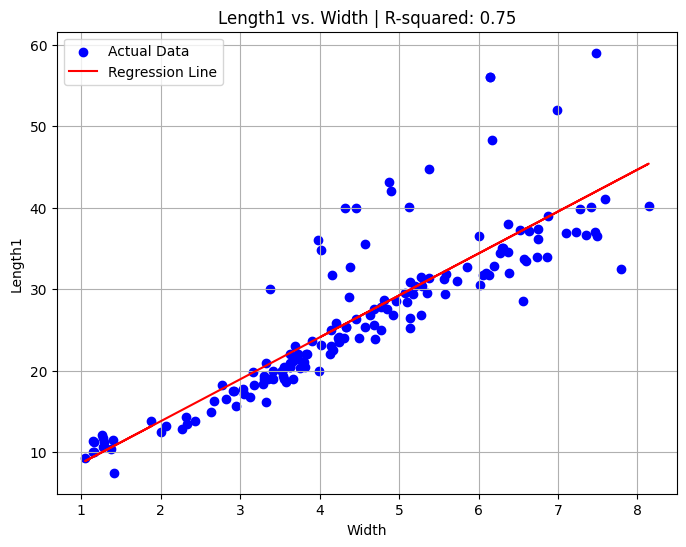

Regression for Length1 vs. Width: R-squared = 0.7518


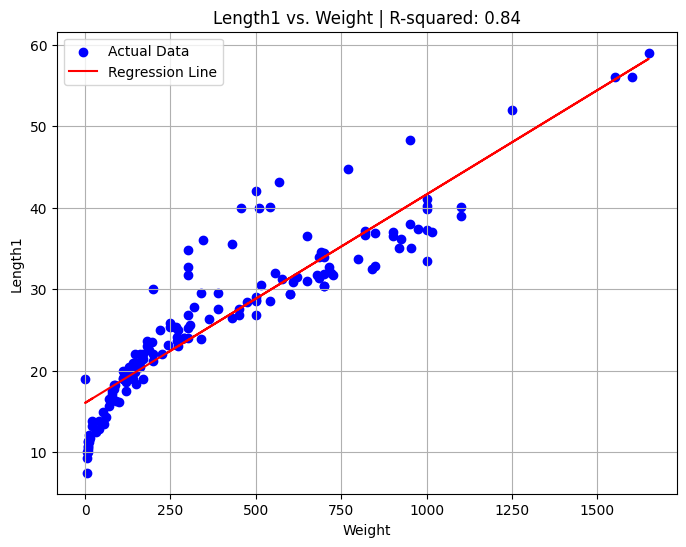

Regression for Length1 vs. Weight: R-squared = 0.8385


In [8]:
y = df['Length1']
independent_vars_set2 = ['Length2', 'Length3', 'Height', 'Width', 'Weight']

print("\n--- Performing Linear Regressions with 'Length1' as Dependent Variable ---")

for ind_var in independent_vars_set2:
    X = df[[ind_var]].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title(f'Length1 vs. {ind_var} | R-squared: {r2:.2f}')
    plt.xlabel(ind_var)
    plt.ylabel('Length1')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Regression for Length1 vs. {ind_var}: R-squared = {r2:.4f}")

## Summary of R-squared Values and Observed Relationships

### R-squared Values for 'Weight' as Dependent Variable:
- **Weight vs. Length1**: R-squared = 0.8385
- **Weight vs. Length2**: R-squared = 0.8439
- **Weight vs. Length3**: R-squared = 0.8520
- **Weight vs. Height**: R-squared = 0.5247
- **Weight vs. Width**: R-squared = 0.7859

### R-squared Values for 'Length1' as Dependent Variable:
- **Length1 vs. Length2**: R-squared = 0.9990
- **Length1 vs. Length3**: R-squared = 0.9841
- **Length1 vs. Height**: R-squared = 0.3911
- **Length1 vs. Width**: R-squared = 0.7518
- **Length1 vs. Weight**: R-squared = 0.8385



In [9]:
r2_values = {
    'Weight vs. Length1': 0.8385,
    'Weight vs. Length2': 0.8439,
    'Weight vs. Length3': 0.8520,
    'Weight vs. Height': 0.5247,
    'Weight vs. Width': 0.7859,
    'Length1 vs. Length2': 0.9990,
    'Length1 vs. Length3': 0.9841,
    'Length1 vs. Height': 0.3911,
    'Length1 vs. Width': 0.7518,
    'Length1 vs. Weight': 0.8385
}

r2_df = pd.DataFrame(r2_values.items(), columns=['Regression', 'R-squared Value'])

print(r2_df.head())


           Regression  R-squared Value
0  Weight vs. Length1           0.8385
1  Weight vs. Length2           0.8439
2  Weight vs. Length3           0.8520
3   Weight vs. Height           0.5247
4    Weight vs. Width           0.7859


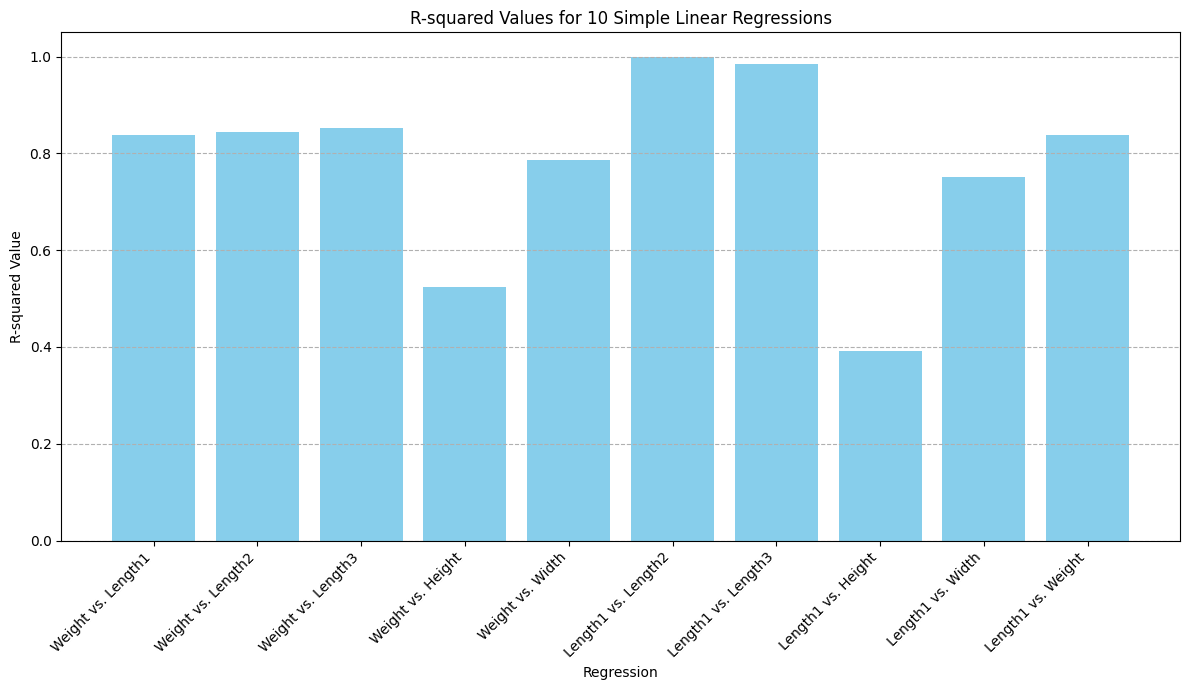

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.bar(r2_df['Regression'], r2_df['R-squared Value'], color='skyblue')
plt.xlabel('Regression')
plt.ylabel('R-squared Value')
plt.title('R-squared Values for 10 Simple Linear Regressions')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05) # R-squared values range from 0 to 1
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [11]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix.round(2))

Correlation Matrix:
         Weight  Length1  Length2  Length3  Height  Width
Weight     1.00     0.92     0.92     0.92    0.72   0.89
Length1    0.92     1.00     1.00     0.99    0.63   0.87
Length2    0.92     1.00     1.00     0.99    0.64   0.87
Length3    0.92     0.99     0.99     1.00    0.70   0.88
Height     0.72     0.63     0.64     0.70    1.00   0.79
Width      0.89     0.87     0.87     0.88    0.79   1.00


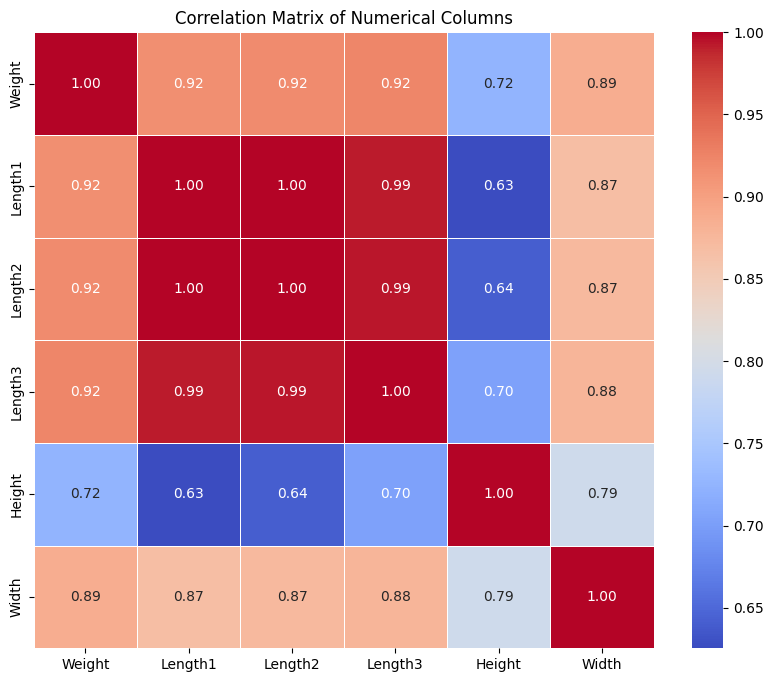

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

The regression with the highest R-squared is: Length1 vs. Length2 (R-squared: 0.9990)


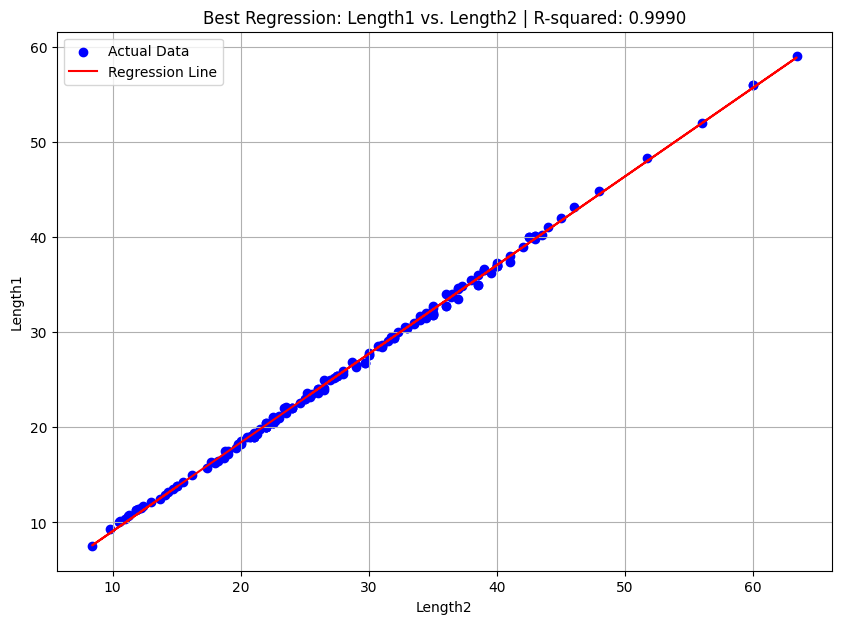


Metrics for the best regression (Length1 vs. Length2):
  R-squared: 0.9990
  Mean Squared Error (MSE): 0.0958
  Mean Absolute Error (MAE): 0.2479
  Root Mean Squared Error (RMSE): 0.3096


In [18]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# highest R-squared value
best_r2_regression = max(r2_values, key=r2_values.get)
best_r2_value = r2_values[best_r2_regression]

print(f"The regression with the highest R-squared is: {best_r2_regression} (R-squared: {best_r2_value:.4f})")

# Extract dependent and independent variables for the best regression
if 'Weight vs.' in best_r2_regression:
    dependent_var = 'Weight'
    independent_var = best_r2_regression.replace('Weight vs. ', '')
elif 'Length1 vs.' in best_r2_regression:
    dependent_var = 'Length1'
    independent_var = best_r2_regression.replace('Length1 vs. ', '')

y_best = df[dependent_var]
X_best = df[[independent_var]].values.reshape(-1, 1)

# Initialize and fit the model for the best regression
best_model = LinearRegression()
best_model.fit(X_best, y_best)

# Make predictions
y_best_pred = best_model.predict(X_best)

# Calculate additional metrics
mse = mean_squared_error(y_best, y_best_pred)
mae = mean_absolute_error(y_best, y_best_pred)
rmse = np.sqrt(mse) # RMSE is the square root of MSE

# Display the scatter plot for the best regression
plt.figure(figsize=(10, 7))
plt.scatter(X_best, y_best, color='blue', label='Actual Data')
plt.plot(X_best, y_best_pred, color='red', label='Regression Line')
plt.title(f'Best Regression: {dependent_var} vs. {independent_var} | R-squared: {best_r2_value:.4f}')
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.legend()
plt.grid(True)
plt.show()

# Print all metrics
print(f"\nMetrics for the best regression ({best_r2_regression}):")
print(f"  R-squared: {best_r2_value:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")

Generating Pairplot for Numerical Columns:


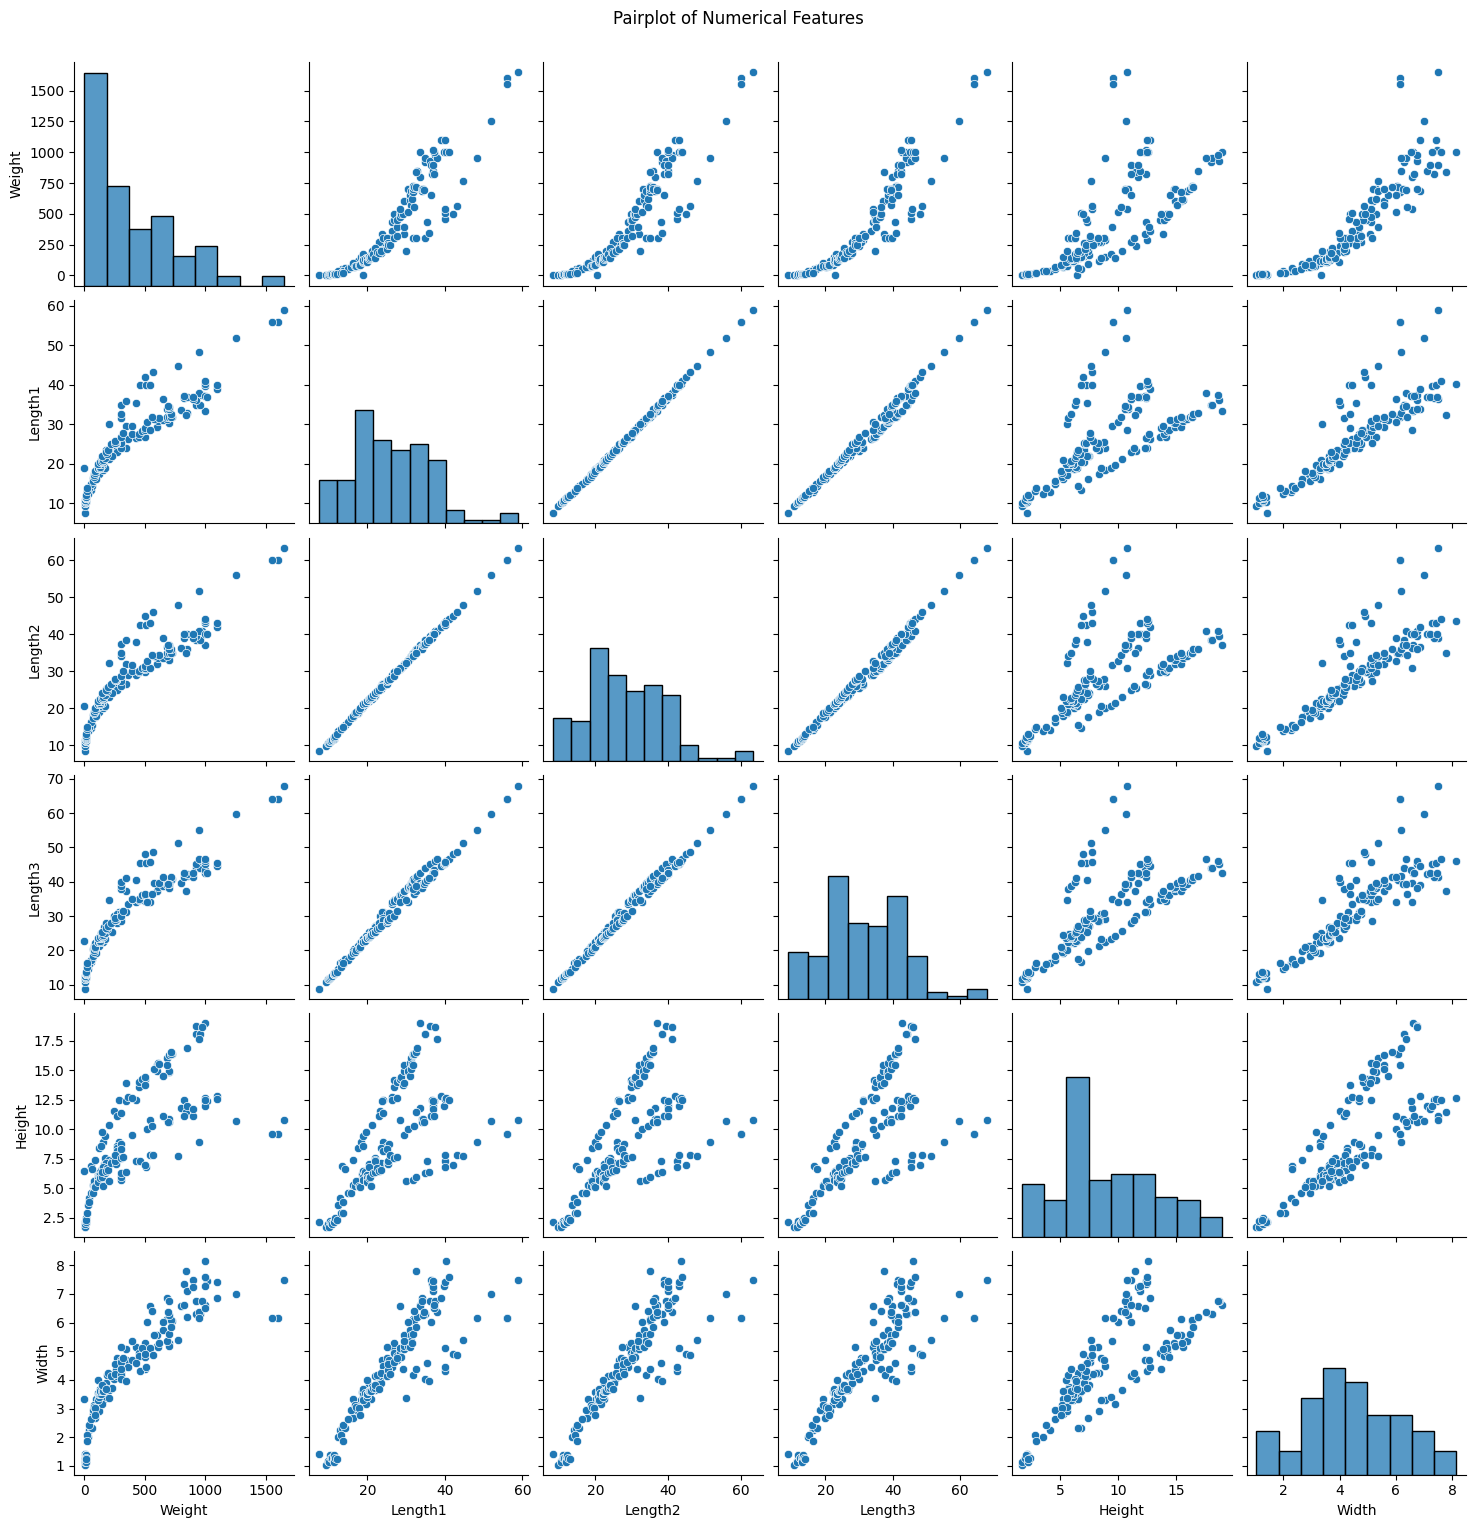


Generating Distribution Plot of Residuals for the Best Model:


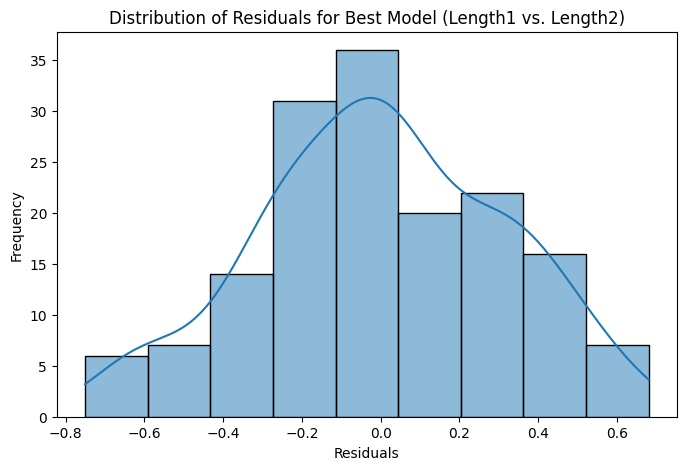

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pairplot for the numerical columns of the dataset
print("Generating Pairplot for Numerical Columns:")
sns.pairplot(df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']])
plt.suptitle('Pairplot of Numerical Features', y=1.02) # Adjust suptitle position
plt.show()

# 2. Distribution plot of residuals from the best model
# 'residuals' variable is already available from the previous best model calculation (Length1 vs. Length2)
print("\nGenerating Distribution Plot of Residuals for the Best Model:")
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals for Best Model (Length1 vs. Length2)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Summary of Simple Linear Regression Analysis

### Our Findings from Simple Linear Regression:

1.  **Strong Predictors for Weight**: We found that the length measurements (`Length1`, `Length2`, `Length3`) are very strong predictors of fish `Weight`, with R-squared values consistently above 0.83. This indicates that over 83% of the variance in fish weight can be explained by these individual length measurements. `Width` also showed a strong relationship with `Weight` (R-squared = 0.7859).
2.  **High Correlation Among Lengths**: There is an extremely high correlation and near-perfect linear relationship among `Length1`, `Length2`, and `Length3`. For instance, the regression of `Length1 vs. Length2` yielded an R-squared of **0.9990**, suggesting these measurements are almost interchangeable. This highlights potential multicollinearity if all were used in a multiple regression model.
3.  **Weaker Role of Height**: `Height` proved to be a weaker predictor for both `Weight` (R-squared = 0.5247) and `Length1` (R-squared = 0.3911) compared to the other dimensions.
4.  **Best Model Performance**: The best performing simple linear regression model was `Length1 vs. Length2`, with an R-squared of 0.9990. Its low Mean Squared Error (MSE: 0.0958), Mean Absolute Error (MAE: 0.2479), and Root Mean Squared Error (RMSE: 0.3096) confirm its excellent predictive accuracy.

### What We Did:

1.  **Data Loading and Initial Inspection**: We started by loading the `Fish[1].csv` dataset into a pandas DataFrame and displaying its initial rows.
2.  **Data Preparation**: We identified and selected the numerical columns relevant for regression (`Weight`, `Length1`, `Length2`, `Length3`, `Height`, `Width`) and confirmed that there were no missing values.
3.  **Simple Linear Regression Analysis**: We performed 10 simple linear regressions:
    *   **Set 1**: `Weight` as the dependent variable against `Length1`, `Length2`, `Length3`, `Height`, and `Width` individually.
    *   **Set 2**: `Length1` as the dependent variable against `Length2`, `Length3`, `Height`, `Width`, and `Weight` individually.
4.  **Visualization of Regressions**: For each of the 10 regressions, we generated scatter plots showing the actual data points, the regression line, and the R-squared value.
5.  **R-squared Comparison**: We compiled all R-squared values into a DataFrame and visualized them using a bar chart for easy comparison.
6.  **Correlation Analysis**: We calculated and visualized the correlation matrix of all numerical columns using a heatmap to understand the pairwise linear relationships.
7.  **Best Model Evaluation**: We programmatically identified the regression with the highest R-squared value (`Length1 vs. Length2`). For this best model, we calculated and displayed detailed performance metrics including R-squared, Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).
8.  **Model Diagnostics**: We created a residual plot and a distribution plot of the residuals for the best model to assess the model's assumptions and the distribution of its errors.